<h1>Image Processing Using VAE(variational autoencoder)

<h2>Import

In [11]:
from variational_autoencoder import VAE
from autoencoder_analysis import select_images, plot_reconstructed_images, plot_add_image
from image_generator import generator

import tensorflow as tf
import matplotlib.pyplot as plt

import pickle

import numpy as np

from sklearn.model_selection import train_test_split

from preprocessing import img_preprocessing, show_image

<h2>Parameters

In [12]:
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
EPOCHS = 20
LATENT_SPACE_DIM=1024
RECONSTUCTION_LOSS_WEIGHT=100000

RAW_IMAGES = "./data/lfw"
RAW_IMAGES_GENERATED = "./data/lfw-generated"

Generating New Images

<h2>Preprocessing

Data load initiated
0.5 -0.5


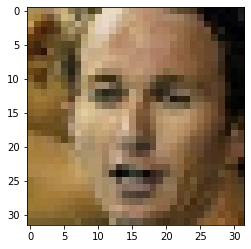

(13233, 32, 32, 3)


In [13]:
X = img_preprocessing(RAW_IMAGES, zoom=60, resolution=[32, 32])
show_image(X[6])
print(X.shape)

Data load initiated
0.5 -0.5


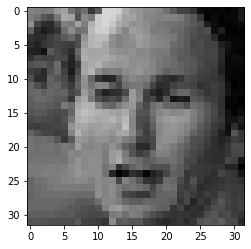

(13233, 32, 32, 3)


In [14]:
X_G = img_preprocessing(RAW_IMAGES, zoom=60, resolution=[32, 32], grayScale=True)
show_image(X_G[6])
print(X.shape)

<h1>Data Preparation</h1>

In [15]:
def prepare_datasets(data, test_size, random_state):
    X_train, X_test = train_test_split(data, test_size=0.1, random_state=42)
    return X_train, X_test

def train(autoencoder, x_train, y_train, x_test, y_test, learning_rate, batch_size, epochs):
    autoencoder.compile(learning_rate)
    history = autoencoder.train(x_train, y_train, x_test, y_test, batch_size, epochs)
    return history

<h2>Splitting Data

In [16]:
x_train, x_test= prepare_datasets(X, test_size=0.1, random_state=42)
x_train_grayscale, x_test_grayscale = prepare_datasets(X_G, test_size=0.1, random_state=42)

<h2>Autoencoder Model

<ul>
<li>Autoencoder is the made of encoder and decoder. Encoder create a lower dimensional representation(latent space) of the the image (compressed image). In the other hand deocder tries to get back the original image from the latent space.

In [17]:
autoencoder = VAE(
        input_shape=X.shape[1:],
        conv_filters=(32, 64, 64, 64),
        conv_kernels=(3, 3, 3, 3),
        conv_strides=(1, 2, 2, 1),
        latent_space_dim=LATENT_SPACE_DIM,
        reconstruction_loss_weight=RECONSTUCTION_LOSS_WEIGHT
    )

autoencoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
encoder_conv_layer_1 (Conv2D)   (None, 32, 32, 32)   896         encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_relu_1 (ReLU)           (None, 32, 32, 32)   0           encoder_conv_layer_1[0][0]       
__________________________________________________________________________________________________
encoder_bn_1 (BatchNormalizatio (None, 32, 32, 32)   128         encoder_relu_1[0][0]             
____________________________________________________________________________________________

In [ ]:
<h2>Imgae Reconstruction

<h3>Train and Save Autoencoder

In [18]:
history = train(autoencoder, x_train, x_train, x_test, x_test, LEARNING_RATE, BATCH_SIZE, EPOCHS)
autoencoder.save("normal-model")

Train on 11909 samples, validate on 1324 samples
Epoch 1/20
11909/11909 [==============================] - 95s 8ms/sample - loss: 11232.9854 - accuracy: 0.7768 - val_loss: 10164.9343 - val_accuracy: 0.8669
Epoch 2/20
11909/11909 [==============================] - 93s 8ms/sample - loss: 6598.9317 - accuracy: 0.8575 - val_loss: 5682.4339 - val_accuracy: 0.8625
Epoch 3/20
11909/11909 [==============================] - 94s 8ms/sample - loss: 5897.0330 - accuracy: 0.8661 - val_loss: 5755.4777 - val_accuracy: 0.8716
Epoch 4/20
11909/11909 [==============================] - 93s 8ms/sample - loss: 5053.8008 - accuracy: 0.8697 - val_loss: 4862.5660 - val_accuracy: 0.8705
Epoch 5/20
11909/11909 [==============================] - 94s 8ms/sample - loss: 4959.1842 - accuracy: 0.8702 - val_loss: 4725.3767 - val_accuracy: 0.8686
Epoch 6/20
11909/11909 [==============================] - 97s 8ms/sample - loss: 4856.7900 - accuracy: 0.8692 - val_loss: 4857.4141 - val_accuracy: 0.8713
Epoch 7/20
11909/11

<h3>Plot Accury And Loss

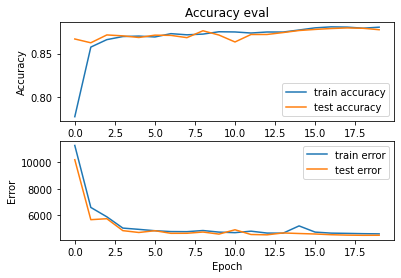

In [19]:
autoencoder.plot_accuracy_loss(history)

<h3>Load Trained Autoencoder

In [20]:
normal_autoencoder = VAE.load("normal-model")

<h3>Randomly Show Both Input And Reconstructed Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


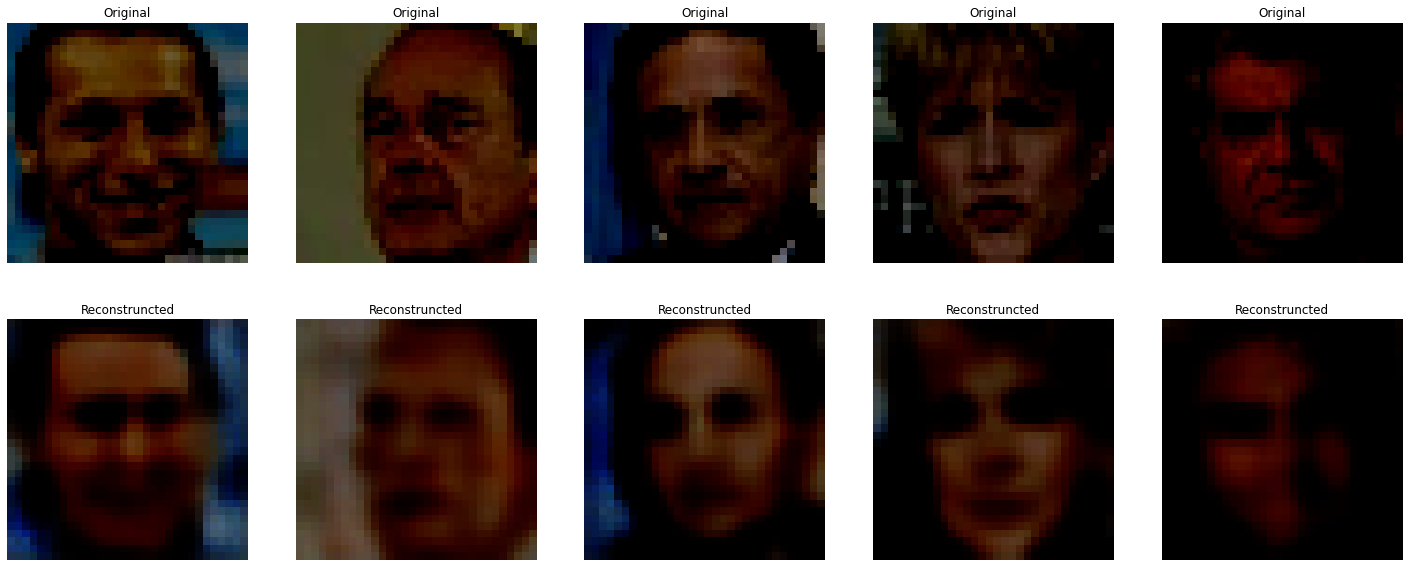

In [21]:
num_sample_images_to_show = 5
sample_images, _ = select_images(x_test, x_test, num_sample_images_to_show)
reconstructed_images, _ = normal_autoencoder.reconstruct(sample_images)
plt = plot_reconstructed_images(sample_images, reconstructed_images, './exported-data/original-reconstructed', 'original-reconstructed.png', True)

<h2>Noise Reduction Model

<h3>Creating Artifical Noise

In [22]:
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

<h3>Testing Different Parameters

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


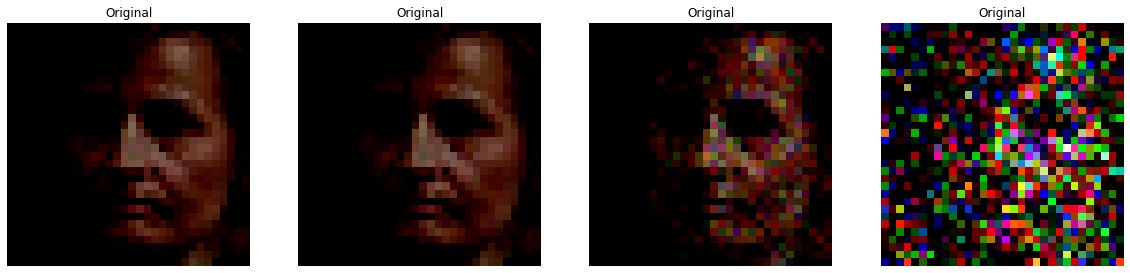

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
images = [x_train[0], apply_gaussian_noise(x_train[:1],sigma=0.01), apply_gaussian_noise(x_train[:1],sigma=0.1), apply_gaussian_noise(x_train[:1],sigma=0.5)]
i = 0
for image in images:
    image = image.squeeze()
    ax = fig.add_subplot(2, len(images), i + 1)
    ax.axis("off")
    ax.set_title('Original')
    ax.imshow(image, cmap="gray_r")
    i = i+1
plt.show()

<h3>Train Autoencoder With Noise

In [27]:
x_train_noise = apply_gaussian_noise(x_train)
x_test_noise = apply_gaussian_noise(x_test)

# We continue to train our model with new noise-augmented data
noise_history = train(autoencoder, x_train_noise, x_train, x_test_noise, x_test, LEARNING_RATE, BATCH_SIZE, EPOCHS)    

Train on 11909 samples, validate on 1324 samples
Epoch 1/20
11909/11909 [==============================] - 105s 9ms/sample - loss: 4656.6016 - accuracy: 0.8794 - val_loss: 4524.4776 - val_accuracy: 0.8783
Epoch 2/20
11909/11909 [==============================] - 103s 9ms/sample - loss: 4619.3058 - accuracy: 0.8798 - val_loss: 4550.4308 - val_accuracy: 0.8771
Epoch 3/20
11909/11909 [==============================] - 103s 9ms/sample - loss: 4614.5298 - accuracy: 0.8780 - val_loss: 4466.0328 - val_accuracy: 0.8772
Epoch 4/20
11909/11909 [==============================] - 103s 9ms/sample - loss: 4575.5514 - accuracy: 0.8797 - val_loss: 4453.6063 - val_accuracy: 0.8783
Epoch 5/20
11909/11909 [==============================] - 103s 9ms/sample - loss: 4565.0140 - accuracy: 0.8793 - val_loss: 4443.9333 - val_accuracy: 0.8776
Epoch 6/20
11909/11909 [==============================] - 104s 9ms/sample - loss: 4554.0108 - accuracy: 0.8794 - val_loss: 4474.8653 - val_accuracy: 0.8742
Epoch 7/20
1190

<h3>Save NoiseFilter Autoencoder

In [28]:
autoencoder.save("noisefilter-model")

<h3>Plot Accuracy And Loss

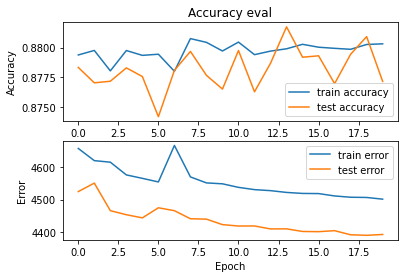

In [29]:
autoencoder.plot_accuracy_loss(noise_history)

<h3>Load Noisefilter Autoencoder

In [30]:
noisefilter_autoencoder = VAE.load("noisefilter-model")

<h3>Randomly Show Both Input And Reconstructed Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


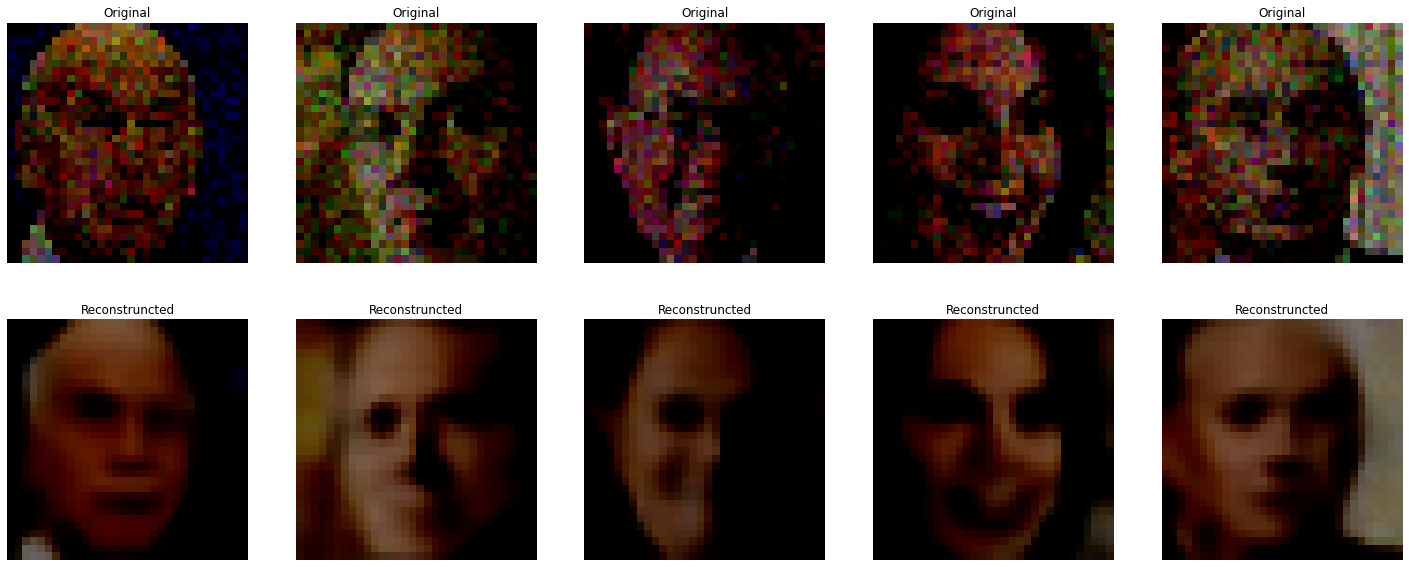

In [31]:
x_test_noise = apply_gaussian_noise(x_test)
num_sample_images_to_show = 5
sample_images, _ = select_images(x_test_noise, x_test_noise, num_sample_images_to_show)
reconstructed_images, _ = noisefilter_autoencoder.reconstruct(sample_images)
plt = plot_reconstructed_images(sample_images, reconstructed_images, './exported-data/noisefilter', 'original-reconstructed.png', True,)

<h2>Adding Two Images


<h3>Load Model

In [43]:
addingimage_autoencoder = VAE.load("normal-model")

<h3>Adding Latent Sapce

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


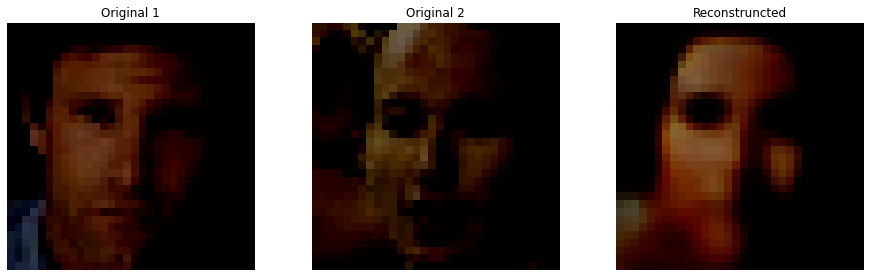

<module 'matplotlib.pyplot' from 'C:\\Users\\Susanta Kumar Behera\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [44]:
image1 = []
image1.append(X[0].reshape(1, X.shape[2], X.shape[2], 3))
image2 = []
image2.append(X[6].reshape(1, X.shape[2], X.shape[2], 3))

reconstructed_image1, latent_space1 = addingimage_autoencoder.reconstruct(image1)
reconstructed_image2, latent_space2 = addingimage_autoencoder.reconstruct(image2)

reconstructed_images = addingimage_autoencoder.reconstruct_from_latentspace(latent_space1 + latent_space2)
plot_add_image(image1[0], image2[0], reconstructed_images[0], './exported-data/generate_image', 'generate_image.png')

<h2>Coloring Images

<h3>Making the Model

In [45]:
grayscale_autoencoder = VAE(
        input_shape=X_G.shape[1:],
        conv_filters=(32, 64, 64, 64),
        conv_kernels=(3, 3, 3, 3),
        conv_strides=(1, 2, 2, 1),
        latent_space_dim=LATENT_SPACE_DIM,
        reconstruction_loss_weight=RECONSTUCTION_LOSS_WEIGHT
    )

grayscale_autoencoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
encoder_conv_layer_1 (Conv2D)   (None, 32, 32, 32)   896         encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_relu_1 (ReLU)           (None, 32, 32, 32)   0           encoder_conv_layer_1[0][0]       
__________________________________________________________________________________________________
encoder_bn_1 (BatchNormalizatio (None, 32, 32, 32)   128         encoder_relu_1[0][0]             
____________________________________________________________________________________________

<h3>Training and Saving the Model

In [47]:
colorimage_history = train(grayscale_autoencoder, x_train_grayscale, x_train, x_test_grayscale, x_test, LEARNING_RATE, BATCH_SIZE, EPOCHS)
autoencoder.save("colorimage-model")

Train on 11909 samples, validate on 1324 samples
Epoch 1/20
11909/11909 [==============================] - 115s 10ms/sample - loss: 4646.3047 - accuracy: 0.8684 - val_loss: 4539.0622 - val_accuracy: 0.8637
Epoch 2/20
11909/11909 [==============================] - 109s 9ms/sample - loss: 4632.1616 - accuracy: 0.8684 - val_loss: 4515.5540 - val_accuracy: 0.8660
Epoch 3/20
11909/11909 [==============================] - 116s 10ms/sample - loss: 4618.5467 - accuracy: 0.8692 - val_loss: 4514.7196 - val_accuracy: 0.8616
Epoch 4/20
11909/11909 [==============================] - 111s 9ms/sample - loss: 4609.2606 - accuracy: 0.8691 - val_loss: 4517.8547 - val_accuracy: 0.8667
Epoch 5/20
11909/11909 [==============================] - 108s 9ms/sample - loss: 4603.7863 - accuracy: 0.8698 - val_loss: 4495.7270 - val_accuracy: 0.8666
Epoch 6/20
11909/11909 [==============================] - 104s 9ms/sample - loss: 4596.6698 - accuracy: 0.8694 - val_loss: 4493.1098 - val_accuracy: 0.8668
Epoch 7/20
11

<h3>Plot Accuracy And Loss

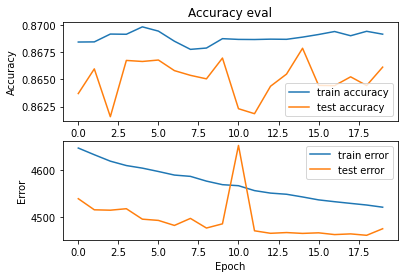

In [48]:
autoencoder.plot_accuracy_loss(colorimage_history)

<h3>Load Model

In [49]:
colorimage_autoencoder = VAE.load("normal-model")

<h3>Randomly Show Both Input And Reconstructed Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


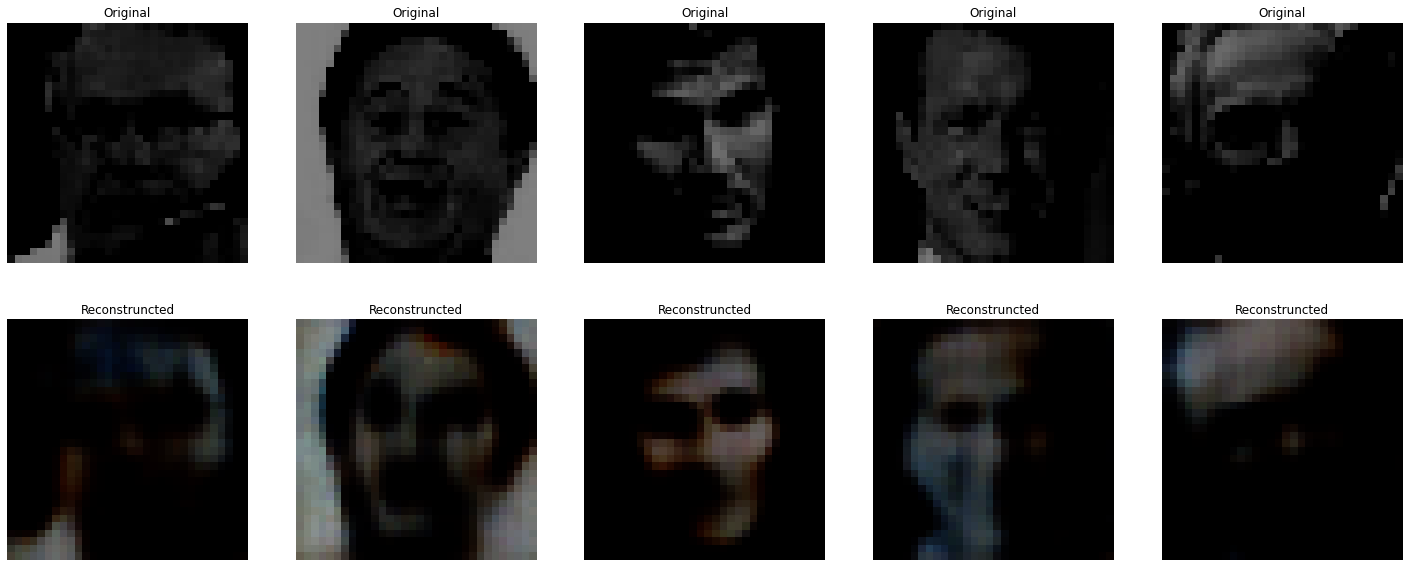

In [50]:
num_sample_images_to_show = 5
sample_images, _ = select_images(x_test_grayscale, x_test_grayscale, num_sample_images_to_show)
reconstructed_images, _ = colorimage_autoencoder.reconstruct(sample_images)
plot_reconstructed_images(sample_images, reconstructed_images, './exported-data/colorimage', 'colorimage.png', True,)